In [1]:
import sys
sys.path.append('./..')
sys.path.append('/central/groups/astuart/hkaveh/QDYN/qdyn-read-only/src')  # For pyqdyn
import matplotlib.pyplot as plt
import numpy as np
from pyqdyn import qdyn
import ProcessFunctions
import matplotlib.font_manager
from matplotlib.gridspec import GridSpec
from scipy.interpolate import interp1d
from ProcessFunctions import FindMw
import cte


In [9]:
Ploteigenfunctions=1
T_final=3500#2500
Ntout=300
Nxout=2
drs=np.array([9])*0.001
L=240e3


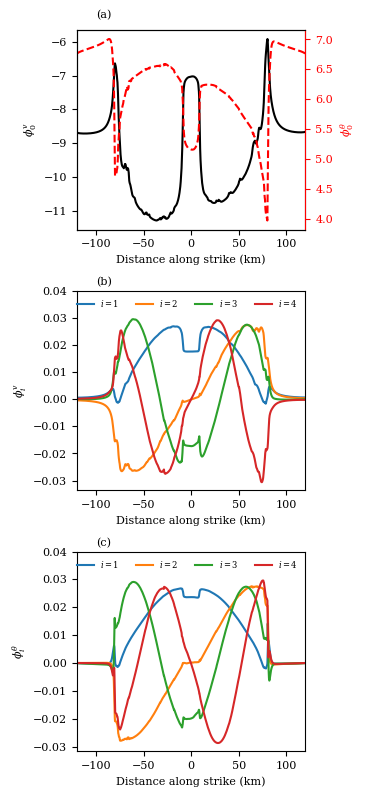

: 

In [10]:

if Ploteigenfunctions==1:
    i=0 # plot eigenfunctinos for i=1
    direct='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/2DSim_MainSimulation_Tf'+str(T_final)+"Nt="+str(Ntout)+'drs'+str(drs[i])+".npz"
    data=np.load(direct)
    v=data["v"]
    theta=data["theta"]
    #tau=p.ox["tau"]
    slip=data["slip"]
    t=data["t"]
    a=data["a"]
    Nx=int(a.shape[0]//2)
    direct1='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+'PODonlyonV'+'drs'+str(drs[i])
    direct2='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+'PODonlyontheta'+'drs'+str(drs[i])
    Data_V=np.load(direct1+'.npz')
    Data_theta=np.load(direct2+'.npz')
    # Plotting the POD components for slip rate and state variable
    # making everything serif font
    # Set global font family to 'serif' and font size to 14
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 8  # You can adjust this value as needed
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    fig,axs=plt.subplots(3,1,figsize=(3.7,8))

    Nx=Data_V["U"].shape[0]
    x_grid=np.linspace(-L/2,L/2,Nx)/1e3
    N_plot=4

# # Plotting on axs[0] two lines with shared x axis but different y axis
    axs[0].plot(x_grid,Data_V["q_bar"],color='black',label=r'$v$')
# # make another plot with different y-axis using twinx:
    ax2=axs[0].twinx()
    ax2.plot(x_grid,Data_theta["q_bar"],color='red',linestyle='--',label=r'$\theta$')
    ax2.tick_params('y', colors='r')
    ax2.spines['right'].set_color('r')

    for i in range(3):
        axs[i].set_xlabel('Distance along strike (km)')
        axs[i].set_xlim(-L/2/1e3,L/2/1e3)
    axs[0].set_ylabel(r'$\phi_0^v$')
    ax2.set_ylabel(r'$\phi_0^\theta$',color='red')
    axs[1].set_ylabel(r'$\phi_i^v$')
    axs[2].set_ylabel(r'$\phi_i^\theta$')

    for i in range(N_plot):


        axs[1].plot(x_grid,Data_V["U"][:,i],label="$i={}$".format(i+1))
        axs[2].plot(x_grid,Data_theta["U"][:,i],label="$i={}$".format(i+1))
    axs[1].set_ylim(top=0.04)
    axs[2].set_ylim(top=0.04)
    axs[1].legend(ncol=4,frameon=False,fontsize=6)
    axs[2].legend(ncol=4,frameon=False,fontsize=6)
    axs[0].text(-100,-5.3,'(a)')
    axs[1].text(-100,0.042,'(b)')
    axs[2].text(-100,0.042,'(c)')
    plt.tight_layout()
    
    #plt.savefig('/central/groups/astuart/hkaveh/Figs/ROM/Eq_PODcomponents.png',dpi=300)

